In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/sudoku3.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

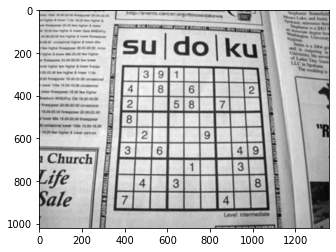

In [3]:
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 3)

plt.imshow(img_blurred, cmap='gray')

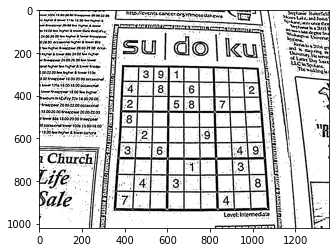

In [4]:
thresh = cv2.adaptiveThreshold(img_blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap='gray')

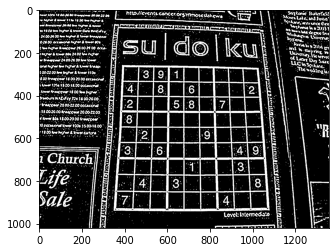

In [5]:
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap = 'gray')

In [6]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = contours[0]

In [7]:
contours = sorted(contours, key= cv2.contourArea, reverse = True)

In [8]:
len(contours)

2475

In [9]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:
        sudoku_contour = approx
        break
        
if sudoku_contour is None:
    print('not found.')

In [10]:
sudoku_contour

array([[[ 389,  258]],

       [[ 351,  939]],

       [[1079,  937]],

       [[1028,  271]]], dtype=int32)

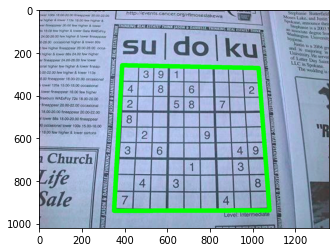

In [11]:
result = cv2.drawContours(img, [sudoku_contour], -1, (0, 255, 0), 20)
plt.imshow(result)